In [2]:
import pandas as pd
train_ = pd.read_csv("./titanic/train.csv")
test_ = pd.read_csv("./titanic/test.csv")
goal_ = pd.read_csv("./titanic/gender_submission.csv")

In [ ]:
# 트레인 데이터의 상태확인
train_.info()

In [ ]:
# 최종 목적 자체가 스케일링 데이터를 넣어서 Score를 측정하는 것이므로 스케일링 가능 데이터에 집중해서 분석해보자 생각
# 각 데이터들의 연관성을 seaborn 내장 모듈 pairplot()을 사용하여 확인
# pairplot()을 쓰면 범주형 데이터의 분포정도를 자세히 알아보기 힘드나, 연속적 데이터들의 분포를 알아보기에 나쁘지 않고,
# 무엇보다 각 데이터들의 연관성을 한 눈에 볼 수 있어서 타겟값과의 연관성 뿐만 아니라,
# 각 데이터들 사이의 연관성(상관계수)을 찾기에 용이하다고 생각. 자세히 모르지만 상관계수도 찾아놓으면 도움이 되지않을까? 하고 포함
# 무엇보다 특성들의 그래프를 한번에 보여주기에 그 데이터프레임의 거시적인 연관성을 빠르게 파악하기 용이

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.pairplot(pd.read_csv("./titanic/train.csv"), hue="Survived", palette='bright')
plt.show()

In [ ]:
# 하지만 의미없는 숫자열인 PassengerID가 껴있고 숫자열이 아닌 정보들은 포함이 안됨. 그렇기에 의미없는 데이터는 삭제하고
# 의미있는 숫자열이 아닌 데이터들을 숫자열화해서 각 데이터들의 연관성을 확인

In [4]:
# 소량 존재하는 age와 fare의 na값들을 각 데이터 평균값으로 대체
train_.fillna(train_.mean(), inplace=True)
test_.fillna(train_.mean(), inplace=True)

# Survived 라는 target 값이랑 연관이 적어 보이는 데이터들 삭제
train_.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'], axis=1, inplace=True)
test_.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'], axis=1, inplace=True)

# Survived와 연관성이 있지만 문자열인 데이터의 숫자열화
train_['Sex'].replace('male',0,inplace=True)
train_['Sex'].replace('female',1,inplace=True)
test_['Sex'].replace('male',0,inplace=True)
test_['Sex'].replace('female',1,inplace=True)




C:\Users\coding\AppData\Local\Temp\ipykernel_7868\4074054968.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_.fillna(train_.mean(), inplace=True)
C:\Users\coding\AppData\Local\Temp\ipykernel_7868\4074054968.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_.fillna(train_.mean(), inplace=True)


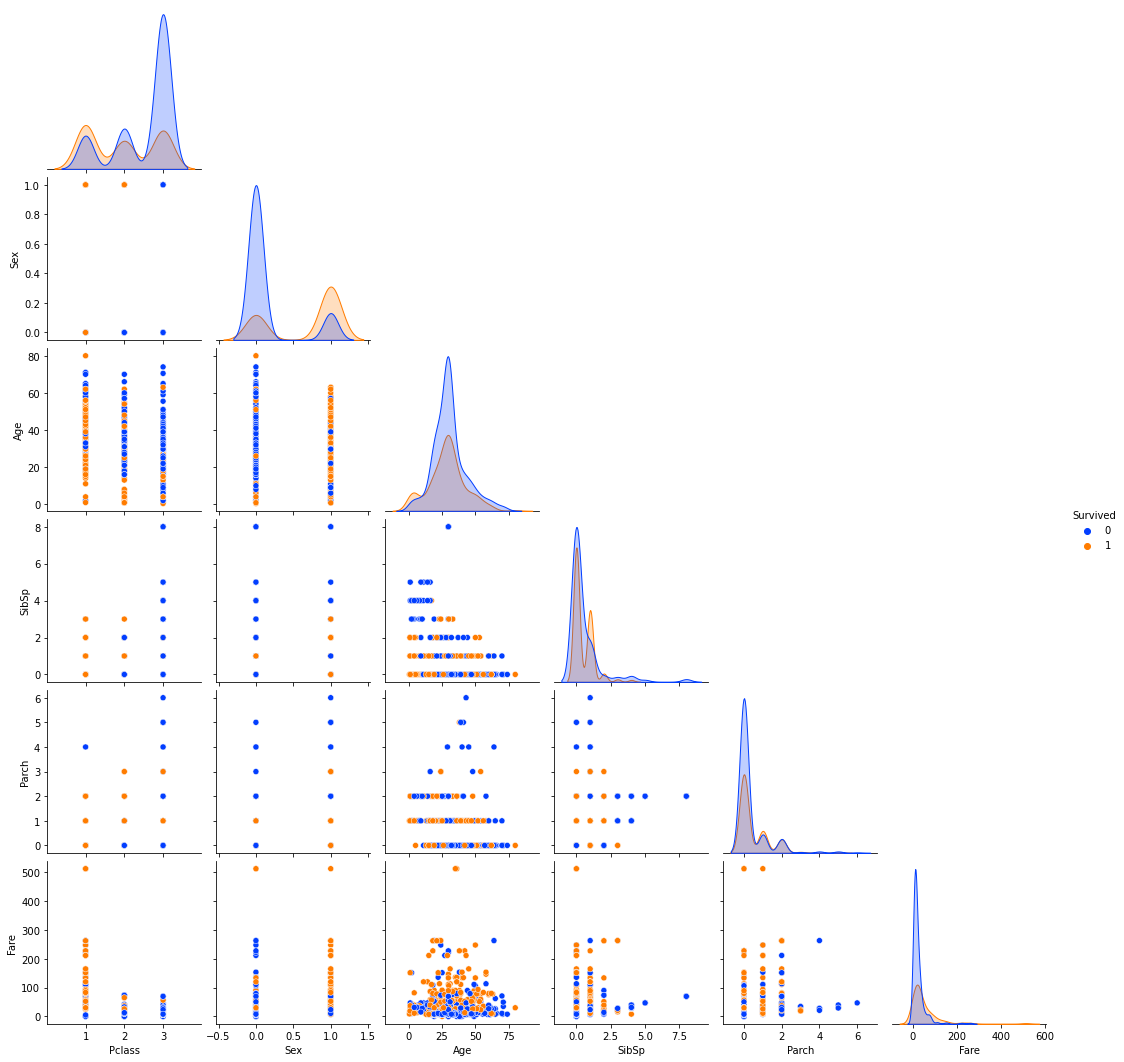

In [5]:
# 전처리한 데이터들로 다시 연관성 분석, corner=True 명령어로 중심축 기준으로 위쪽 중복데이터 삭제
sns.pairplot(train_, hue="Survived", palette='bright', corner=True)
plt.show()

In [22]:
# 타겟 survived를 hue로 지정해 놓고 특성끼리의 특정 조합이 survived값과 어떤 눈에 띄는 연관성이 있는지 탐색
# 행과 열이 동일한 곳에서는 그 특성과 Survived 사이의 연관성을 파악할 수 있음

# 1. Pclass: 1등급 선실에서는 생존자가 더 높고 2등급은 사망자가 높음. 3등급은 월등하게 사망자 비율이 높음.
            # age) 1등급 선실에서는 나이불문 상당수가 살아남음. 반면 2등급 선실에서는 20대 미만 어린층의 생존이 눈에 띔.
            # fare) 돈을 많이 냈고 등급 높은 선실이었던 사람들의 생존율이 엄청 높음.
            # 돈을 많이 냄(fare) = 선실의 등급이 높음(Pclass)이라 가정해도 무방, fare가 스케일링이 가능하므로
            # fare 이 높다 = 등급이 높은 선실이다 라고 가정하고 데이터 분석을 하겠음.
            
# 2. Sex: 남 녀 성별에 따른 생존율이 극명하게 차이남이 보임
            # age)남자들은 나이에 따른 사망률이 큰 차이를 보이지 않지만 여자들은 40대 이상에서 높은 생존율을 보임
            # fare) 2~3등급 선실의 남자들은 대부분 죽었으나 여자는 2등급만 되어도 높은 생존율을 보임
            
# 3. Age: 
            # fare) 뭔가 패턴이 있는 것 같은데 확대해서 봐보자.
            # SibSp) 배우자나 형제 자매가 많고 20대 이하의 젊은 층의 사망자 비율이 상당히 높은 점이 눈에 띄인다.
        
# 4. SibSp: 배우자나 형제 자매 없이 혼자 온 사람들이 가장 많고, 1~2명의 배우자나 형제 자매와 함께 온 사람들도 많다.
            # 1~2명의 배우자나 형제 자매와 함께 온 사람들의 생존율이 높은 것이 눈에 띄인다.


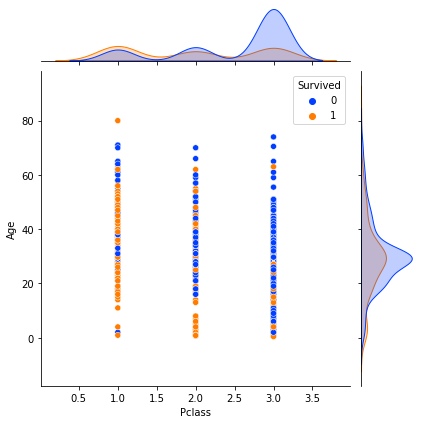

In [11]:
# 거시적으로 보았을 때 연관성이 보였던 조합들을 확대해서 시각화 by sns.jointplot()
# jointplot()은 히스토그램을 그래프에 붙여서 제공하기에 좀 더 직관적으로 어떤 데이터가 의미있는지 파악하기 용이함

# 1. Pclass

# Age) '2등급 선실에서는 20대 미만 어린층의 생존이 눈에 띔.'

sns.jointplot(x='Pclass', y='Age', data=train_, hue='Survived', palette='bright')
plt.show()

# 2등급 선실 20세 이하 층의 생존율이 높긴 하지만 히스토그램 상 표본이 큰 부분이 아니므로 의미부여하기 힘듬

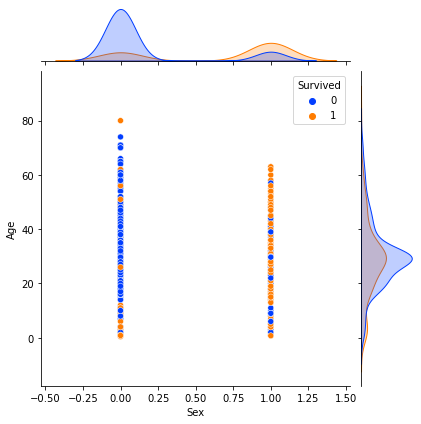

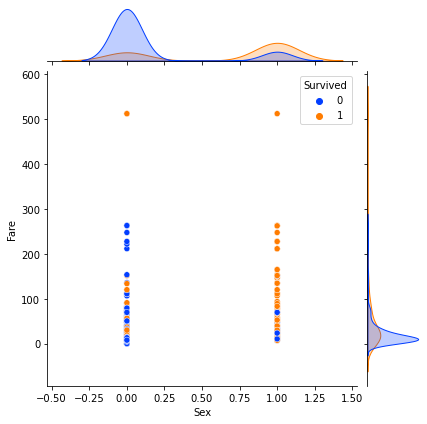

In [17]:
# 2. Sex: 

# age) 남자들은 나이에 따른 사망률이 큰 차이를 보이지 않지만 여자들은 40대 이상에서 높은 생존율을 보임
sns.jointplot(x='Sex', y='Age', data=train_, hue='Survived', palette='bright')
plt.show()
print()

# fare) 2~3등급 선실의 남자들은 대부분 죽었으나 여자는 2등급만 되어도 높은 생존율을 보임
sns.jointplot(x='Sex', y='Fare', data=train_, hue='Survived', palette='bright')
plt.show()

# 1) 좀 더 확대해서 보니 40대 이상 여자의 생존율이 두드러지는 특징은 아닌 것 같다.
# 2) 성별과 지불요금이라는 두 가지의 특성 연관성에 따라 Survived 요소에 영향을 주는 것으로 볼 수 있다. 확실히 여성 2등급 부터는
#    생존율이 눈에 띄게 올라간다.
# 그리고 Sex와 Survived도 확실한 연관성이 보인다.

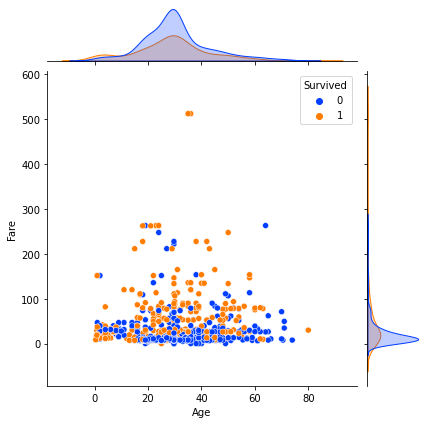

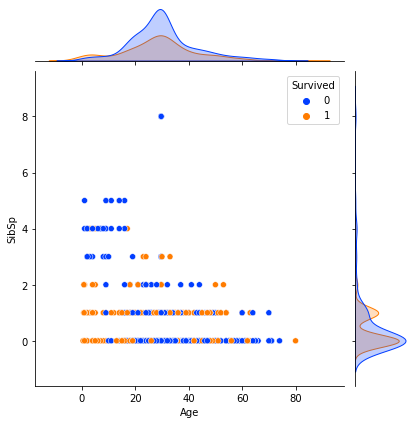

In [19]:
# 3. age: 

# fare) 무언가 패턴이 있는 것 같은데 확대해서 봐보자.
sns.jointplot(x='Age', y='Fare', data=train_, hue='Survived', palette='bright')
plt.show()
print()

# SibSp) 배우자나 형제 자매가 많고 20대 이하의 젊은 층의 사망자 비율이 상당히 높은 점이 눈에 띄인다.
sns.jointplot(x='Age', y='SibSp', data=train_, hue='Survived', palette='bright')
plt.show()

# 1) 무언가 패턴이 없다.
# 2) 의미는 있어보이지만 히스토그램상 큰 의미를 두긴 어려워 보인다.
# 3) Age가 어릴수록 생존율이 높다.(히스토그램 상) Survived랑 연관성이 있다.

C:\Users\coding\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


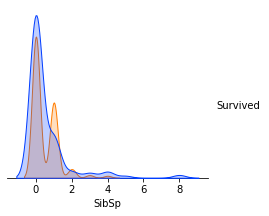

In [21]:
# 4. SibSp: 배우자나 형제 자매 없이 혼자 온 사람들이 가장 많고, 1~2명의 배우자나 형제 자매와 함께 온 사람들도 많다.
            # 1~2명의 배우자나 형제 자매와 함께 온 사람들의 생존율이 높은 것이 눈에 띄인다.
    
sns.pairplot(train_, size=3, vars=['SibSp'], hue='Survived', palette='bright', corner=True)

# 히스토그램상 표본도 크기에 Survived와 연관성을 가질만 하다.

In [ ]:
#정리하자면 
# 1) 성별과 지불요금이라는 두 가지의 특성 연관성에 따라 Survived 요소에 영향을 주는 것으로 볼 수 있다. 확실히 여성 2등급 부터는
#    생존율이 눈에 띄게 올라간다. 
# 그리고 Sex와 Fare 각각 Survived와도 연관성이 보인다.

# 2) Age가 어릴수록 생존율이 높다.(히스토그램 상) Survived랑 연관성이 있다.
# 3) SibSp가 히스토그램상 표본도 크기에 Survived와 연관성을 가질만 하다.

# 그런데 이제와서 데이터 넣을 생각하다보니 성별과 지불요금의 특정 교집합 부분이 Survived와 상관계수를 가진다해서 그걸 어떻게 사용해야
# 하는지 모르겠다. 두 데이터간의 상관관계도 아니다보니 의미가 없는 데이터 공부를 한 것 같다.
# 그렇기에 그래프 상 연관성이 보이는 Sex, Fare, Age, SibSp를 특성으로 삼고 스케일링, 세트분리, 모델링을 진행하겠다.

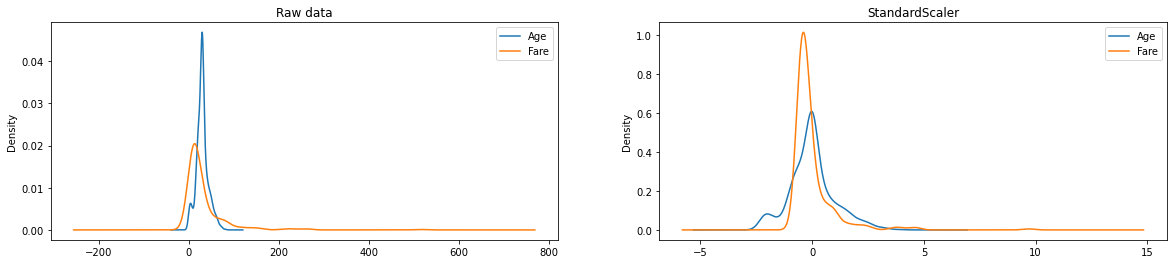

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# 그런데 Sex와 SibSp는 범주형 데이터다. 스케일링은 당연히 할 수 없고 모델링에 0과 1로 들어가서 훈련하는 것이 과연 그 모델의 신뢰성이
# 생기는 것일까? 과대적합만 무지하게 나올것 같다. 그래도 혹시 모르니 둘 다 해보자.
# 먼저 스케일링 가능한 특성인 Fare와 Age만 스케일링, 세트분리, 모델링을 진행하겠다. 

ag = train_[['Age','Fare']]

ss = StandardScaler()
scaled_ag = pd.DataFrame(ss.fit_transform(ag), columns=ag.columns)


fig, ax = plt.subplots(1, 2, figsize=(20, 4))

ag.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_ag.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()



In [27]:
train_

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [29]:
# 타겟 데이터 설정

Survived_target = train_.iloc[:, 0]
Survived_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
# 스케일링 된 scaled_ag를 트레인, 테스트 셋으로 분류.
# 보통 현업에서는 작동중인 모델에 테스트 셋이 추가로 들어오는 경우가 많기에 테스트 셋에 스케일링을 새로 한다는 것을 기억하면 좋음

# 학습셋과 테스트셋을 75:25 비율로 나눕니다.
ag_train, ag_test, target_train, target_test = train_test_split(scaled_ag, Survived_target)

In [31]:
#결정 트리
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(ag_train, target_train)

y_pred = classifier.predict(ag_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=ag_train, y=target_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.87 %
Standard Deviation: 7.18 %


In [32]:
#에이다 부스트
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(ag_train, target_train)

y_pred = classifier.predict(ag_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=ag_train, y=target_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.12 %
Standard Deviation: 5.14 %


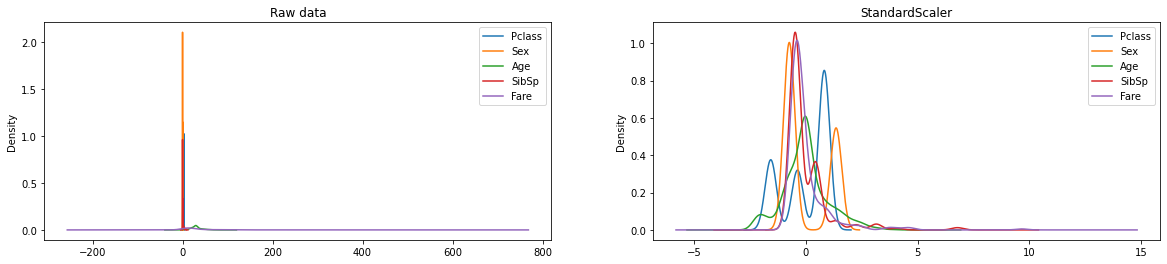

,Age,Fare,Pclass,Sex,SibSp
0,-0.592481,-0.502445,3,0,1
1,0.638789,0.786845,1,1,1
2,-0.284663,-0.488854,3,1,0
3,0.407926,0.420730,1,1,1
4,0.407926,-0.486337,3,0,0
...,...,...,...,...,...
886,-0.207709,-0.386671,2,0,0
887,-0.823344,-0.044381,1,1,0
888,0.000000,-0.176263,3,1,1
889,-0.284663,-0.044381,1,0,0


In [40]:
# 이제 위에서 특성들과 타깃 간에 연관성이 있어보이던 범주형 데이터까지 넣어서 다시 해보자
# 연관성이 없다고 판단된 데이터를 드롭한다. 타겟도.
df_a = train_.drop(['Survived', 'Parch'], axis=1)

ss = StandardScaler()
scaled_df_a = pd.DataFrame(ss.fit_transform(df_a), columns=df_a.columns)


fig, ax = plt.subplots(1, 2, figsize=(20, 4))

df_a.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_df_a.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()


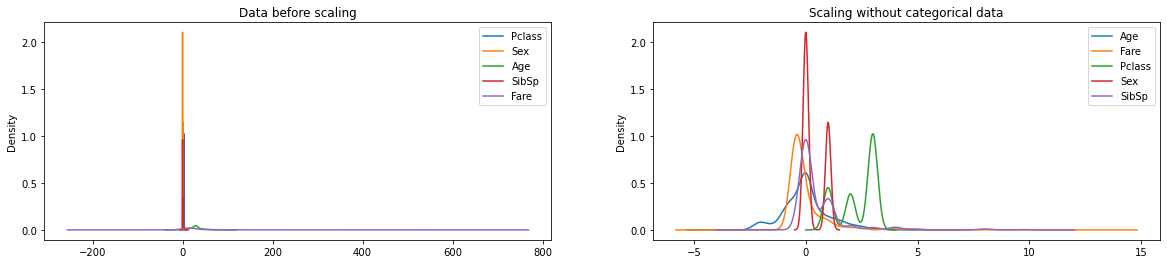

In [44]:
#아 범주형은 스케일하면 안되지 다시 하자. 기존에 해놓은 scaled_ag와 범주형 데이터프레임을 concat()으로 합쳐주자

df_b = train_.drop(['Survived', 'Parch', 'Age', 'Fare'], axis=1)
df_final = pd.concat([scaled_ag, df_b], axis=1)


fig, ax = plt.subplots(1, 2, figsize=(20, 4))


df_a.plot(kind='kde', title='Data before scaling', ax=ax[0])
df_final.plot(kind='kde', title='Scaling without categorical data', ax=ax[1])
plt.show()

In [47]:
# 타겟 데이터 설정

Survived_target = train_.iloc[:, 0]
Survived_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
# 보통 현업에서는 작동중인 모델에 테스트 셋이 추가로 들어오는 경우가 많기에 테스트 셋에 스케일링을 새로 한다는 것을 기억하면 좋음

# 학습셋과 테스트셋을 75:25 비율로 나눕니다.
df_train, df_test, target_train, target_test = train_test_split(df_final, Survived_target)

In [49]:
#결정 트리
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(df_train, target_train)

y_pred = classifier.predict(df_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=df_train, y=target_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.40 %
Standard Deviation: 3.53 %


In [50]:
#에이다 부스트
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(df_train, target_train)

y_pred = classifier.predict(df_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=df_train, y=target_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.09 %
Standard Deviation: 2.81 %


In [ ]:
# 정확도가 훨씬 올랐지만 범주형 숫자열 데이터 0, 1 범벅인 애들을 모델에 돌려도 되는건지 여전히 잘 모르겠다.
# 어차피 같은 계수(특성)끼리 넣어줄거니 상관이 없다면 스케일링은 왜 하는건지? 
# 그 래 서, 컴퓨터가 숫자로 인식하지 않는 One Hot 인코딩을 해주는 것!